In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
random_qubo_results = np.loadtxt('random_qubo_benchmark/results')
tsp_qubo_results = np.loadtxt('tsp_qubo_benchmark/results')
tsp_qbo_results = np.loadtxt('tsp_qbo_benchmark/results')
tsp_square_constraint_qbo_results = np.loadtxt('tsp_square_constraint_qbo_benchmark/results')

In [3]:
cplex_random_qubo = np.array([
    [25, 1, -35.64, 0.02],
    [25, 0, -31.559, 0.03],
    [30, 1, -38.395, 0.14],
    [30, 0, -39.194, 0.08],
    [35, 1, -41.407, 0.17],
    [35, 0, -55.844, 0.09],
    [40, 1, -62.07, 0.17],
    [40, 0, -51.125, 0.11],
    [45, 1, -66.15, 0.16],
    [45, 0, -68.322, 0.17],
    [50, 1, -104.271, 0.16],
    [50, 0, -75.409, 0.55],
    [55, 1, -100.291, 0.2],
    [55, 0, -100.427, 0.53],
    [60, 1, -119.805, 0.25],
    [60, 0, -109.074, 2.52],
    [65, 1, -103.212, 0.89],
    [65, 0, -144.525, 0.86],
    [70, 1, -118.854, 9.17],
    [70, 0, -168.031, 0.59],
    [75, 1, -205.305, 0.59],
    [75, 0, -118.606, 15.34],
    [80, 1, -155.678, 57.11],
    [80, 0, -152.761, 235.13],
    [85, 1, -203.169, 37.84],
    [85, 0, -186.266, 3000],
    [90, 1, -247.7, 6.14],
    [90, 0, -220.408, 12.98],
    [95, 1, -263.812, 48.44],
    [95, 0, -230.803, 111.3],
    [100, 1, -243.614, 3966.44],
    [100, 0, -239.496, 981.09]
])

In [4]:
cplex_tsp_qbo_results = np.array([
    [25, 1, 17.677, 0.09],
    [25, 0, 26.839, 0.05],
    # [36, 1, 26.593, 0.05], #These data points were omitted (also in the qbo data set). The objectives had to be copied by hand, and we have reason to believe, 
    # that in one case there was an error, because D-Wave found a better solution than the supposed global optimum from D-Wave. 
    # [36, 0, 13.751, 0.06],
    [49, 1, 16.682, 0.16],
    [49, 0, 20.429, 0.13],
    [64, 1, 17.017, 0.17],
    [64, 0, 17.332, 0.13],
    [81, 1, 15.604, 0.19],
    [81, 0, 21.321, 0.16],
    [100, 1, 9.724, 0.16],
    [100, 0, 22.439, 0.30],
    [121, 1, 17.831, 0.59],
    [121, 0, 17.265, 0.44],
    [144, 1, 10.947, 0.63],
    [144, 0, 20.938, 1.91],
    [169, 1, 18.69, 2.33],
    [169, 0, 19.851, 3.08],
    [196, 1, 16.346, 6.27],
    [196, 0, 21.839, 9.30],
    [225, 1, 14.534, 6.67],
    [225, 0, 21.872, 19.13],
    [256, 1, 19.431, 53.14],
    [256, 0, 14.991, 15.44],
    [289, 1, 20.59, 40.34],
    [289, 0, 15.5, 63.02],
    [324, 1, 19.441, 927.72],
    [324, 0, 20.668, 2036.36]
])

In [5]:
cplex_tsp_qubo_results = np.array([
    [25, 1, 17.677, 0.03],
    [25, 0, 26.839, 0.03],
    # [36, 1, 26.593, 0.05], # omitted, see above why.
    # [36, 0, 13.751, 0.14],
    [49, 1, 16.682, 0.08],
    [49, 0, 20.429, 0.06],
    [64, 1, 17.017, 0.22],
    [64, 0, 17.332, 0.17],
    [81, 1, 15.604, 0.38],
    [81, 0, 21.321, 0.41],
    [100, 1, 9.724, 0.59],
    [100, 0, 22.439, 1.27],
    [121, 1, 17.831, 2.53],
    [121, 0, 17.265, 2.34],
    [169, 1, 18.69, 19.00],
    [169, 0, 19.851, 28.88],
    #[196, 0, 21.839, 36.39],
    [225, 1, 14.534, 42.70],
    [225, 0, 21.872, 85.53],
])

In [40]:
 def plot_results(dwave_results, cplex_results, time_unit='$s$', title=''):
    dwave_results = {(size, instance, time): objective for size, instance, time, objective in dwave_results}
    cplex_results = {(size, instance): [time, objective] for size, instance, objective, time in cplex_results}
    dwave_calculation_times = np.sort(list({time for size, instance, time in dwave_results.keys()}))

    dims_dwave = {size for size, instance, time in dwave_results.keys()}
    dims_cplex = {size for size, instance in cplex_results.keys()}
    dimensions = np.sort(list(
        dims_dwave.intersection(dims_cplex)
    ))

    cplex_time = np.array([
        (cplex_results[(size, 0)][0] + cplex_results[(size, 1)][0])/2
        for size in dimensions
    ])

    optimality_gap = np.array([
        [
            (
                (dwave_results[(size, 0., time)] + dwave_results[(size, 1., time)]) / 
                (cplex_results[(size, 0.)][1] + cplex_results[(size, 1.)][1])- 
                1) * np.sign(cplex_results[(size, 0.)][1])
            for size in dimensions
        ] 
        for time in dwave_calculation_times
    ])

    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    markers = ['.', '+', 'x', 'o', 'P']
    ax2.set_ylabel('optimality gap D-Wave', color=color)  # we already handled the x-label with ax1
    for counter, gaps in enumerate(optimality_gap):
        ax2.plot(dimensions, gaps, markers[counter], color=color, label=f'D-Wave time {dwave_calculation_times[counter]} {time_unit}')
    ax2.tick_params(axis='y', labelcolor=color)

    color = 'tab:red'
    ax1.set_xlabel('dimension')
    ax1.set_ylabel(f'cplex time [{time_unit}]', color=color)
    ax1.semilogy(dimensions, cplex_time, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    plt.title(title)
    plt.legend()
    fig.tight_layout() 
    plt.savefig(title.replace(' ', '_') + '_plot')
    plt.show()

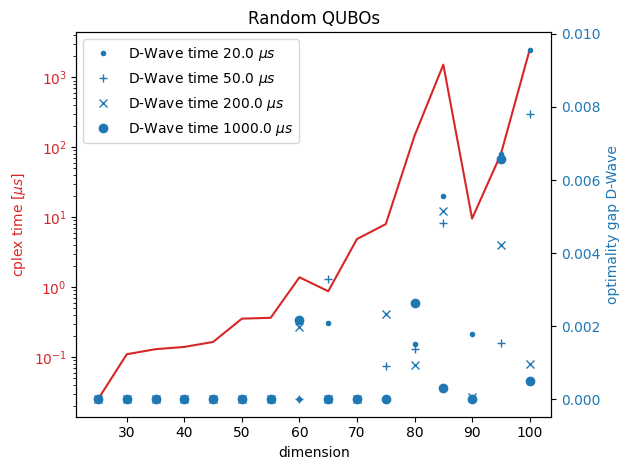

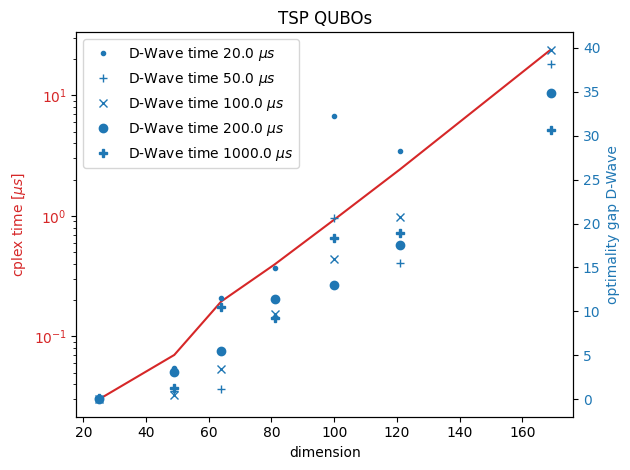

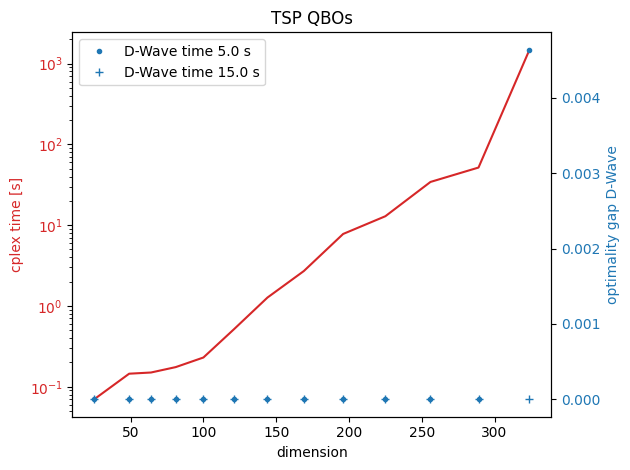

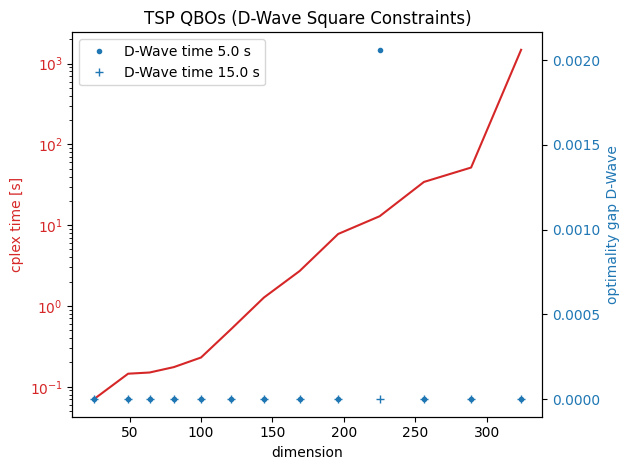

In [41]:
plot_results(random_qubo_results, cplex_random_qubo, time_unit='$\mu s$', title='Random QUBOs')
plot_results(tsp_qubo_results, cplex_tsp_qubo_results, time_unit='$\mu s$', title='TSP QUBOs') 
plot_results(tsp_qbo_results, cplex_tsp_qbo_results, time_unit='s', title='TSP QBOs')
plot_results(tsp_square_constraint_qbo_results, cplex_tsp_qbo_results, time_unit='s', title='TSP QBOs (D-Wave Square Constraints)')